# Cosines Similarity between Images

## Written by: Rodrigo Escandon

# Executive Summary

A similarity evaluation is being done for images using the cosine similarity technique. These RGB images will have their dimensions reduced from 3 to 1, and subsequently the cosine distance and similarity will be calculated. This type of technique can be effective if the image quality stays consistent and the classification types are dissimilar. This type of technique can also be considered as a soft target labeller when dealing with images that are not labelled and a machine learning model is intended to be built.

In [1]:
#Importing libraries

import numpy as np
import cv2
from scipy import spatial
from matplotlib import pyplot as plt

In [2]:
#Importing images and resizing

black_bear_1='./black_bear_1.jpg'
black_bear_2='./black_bear_2.jpg'
grizzly_bear_1='./grizzly_bear_1.jpg'
grizzly_bear_2='./grizzly_bear_2.jpg'

def image(image):
    
    n=128
    res=cv2.imread(image)
    res=cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
    res=cv2.resize(res,[n,n])
    
    return res

bb_1=image(black_bear_1)
bb_2=image(black_bear_2)
gb_1=image(grizzly_bear_1)
gb_2=image(grizzly_bear_2)

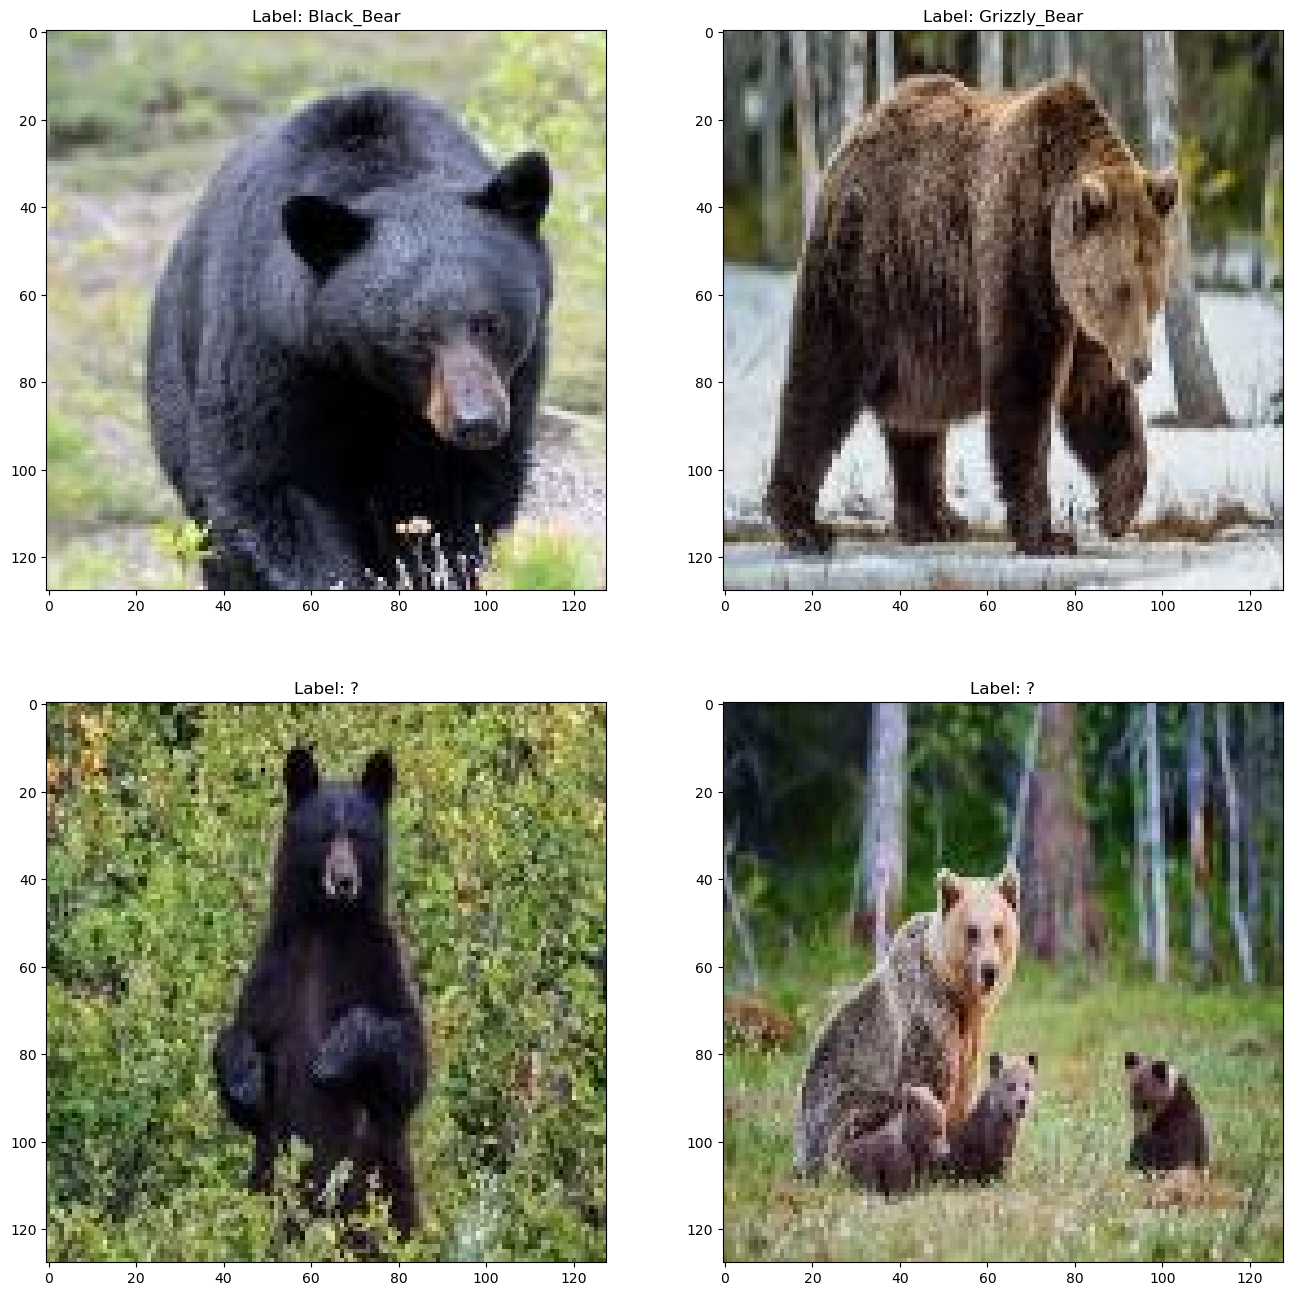

In [3]:
#Displaying the images with labels and unlabelled
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(16,16))
ax1.imshow(bb_1)
ax1.title.set_text('Label: Black_Bear')
ax2.imshow(gb_1)
ax2.title.set_text('Label: Grizzly_Bear')
ax3.imshow(bb_2)
ax3.title.set_text('Label: ?')
ax4.imshow(gb_2)
ax4.title.set_text('Label: ?')

In [4]:
#Converting 3 dimensional images to 1 dimension
print('Initial Shape: ',bb_1.shape)
bb_10=bb_1.flatten()
print('Converted Shape: ',bb_1.shape)

Initial Shape:  (128, 128, 3)
Converted Shape:  (128, 128, 3)


In [5]:
bb_20=bb_2.flatten()
gb_10=gb_1.flatten()
gb_20=gb_2.flatten()

In [6]:
#Normalizing scales (0-1)
bb_10=bb_10/255
bb_20=bb_20/255
gb_10=gb_10/255
gb_20=gb_20/255

In [7]:
#Evaluating images and determining which image is similar to exsiting labelled images
bb=(-1 * (spatial.distance.cosine(bb_10, gb_20) - 1))
gb=(-1 * (spatial.distance.cosine(gb_10, gb_20) - 1))
if bb>=gb:
    label1='Black_Bear'
else:
    label1='Grizzly_Bear'

In [8]:
bb=(-1 * (spatial.distance.cosine(bb_10, bb_20) - 1))
gb=(-1 * (spatial.distance.cosine(gb_10, bb_20) - 1))
if bb>=gb:
    label2='Black_Bear'
else:
    label2='Grizzly_Bear'

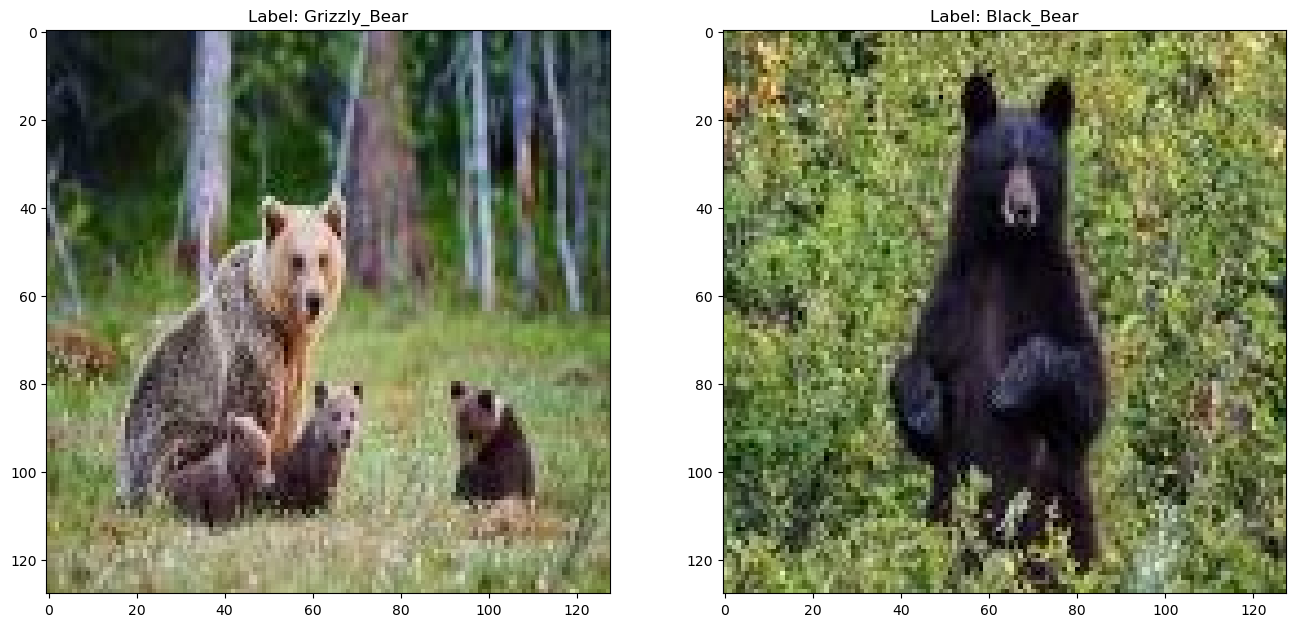

In [9]:
#Displaying the images with the labels that were obtained by the cosine similarity analysis
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,16))
ax1.imshow(gb_2)
ax1.title.set_text('Label: '+label1)
ax2.imshow(bb_2)
ax2.title.set_text('Label: '+label2)